In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import QuantileTransformer,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier


import seaborn as sns

In [49]:
df = pd.read_csv("Iris.csv")


In [50]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']


In [51]:
#scaler=StandardScaler()
scaler=QuantileTransformer()
X=scaler.fit_transform(X)
X

/home/tamizh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([[0.24161074, 0.86241611, 0.11073826, 0.13087248],
       [0.12416107, 0.46644295, 0.11073826, 0.13087248],
       [0.06375839, 0.67785235, 0.04697987, 0.13087248],
       [0.04362416, 0.59395973, 0.19798658, 0.13087248],
       [0.17785235, 0.89597315, 0.11073826, 0.13087248],
       [0.32550336, 0.96979866, 0.30536913, 0.29530201],
       [0.04362416, 0.80201342, 0.11073826, 0.24832215],
       [0.17785235, 0.80201342, 0.19798658, 0.13087248],
       [0.01342282, 0.34563758, 0.11073826, 0.13087248],
       [0.12416107, 0.59395973, 0.19798658, 0.        ],
       [0.32550336, 0.90939597, 0.19798658, 0.13087248],
       [0.08724832, 0.80201342, 0.26845638, 0.13087248],
       [0.08724832, 0.46644295, 0.11073826, 0.        ],
       [0.        , 0.46644295, 0.00671141, 0.        ],
       [0.51006711, 0.97986577, 0.01677852, 0.13087248],
       [0.45973154, 1.        , 0.19798658, 0.29530201],
       [0.32550336, 0.96979866, 0.04697987, 0.29530201],
       [0.24161074, 0.86241611,

In [52]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [54]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train,y_train)
dt_predict = dt_model.predict(x_test)

print('Decision Tree - ',accuracy_score(dt_predict,y_test))

Decision Tree -  0.9333333333333333


In [55]:
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_3 <= 0.34
|   |--- class: 0
|--- feature_3 >  0.34
|   |--- feature_3 <= 0.68
|   |   |--- class: 1
|   |--- feature_3 >  0.68
|   |   |--- class: 2



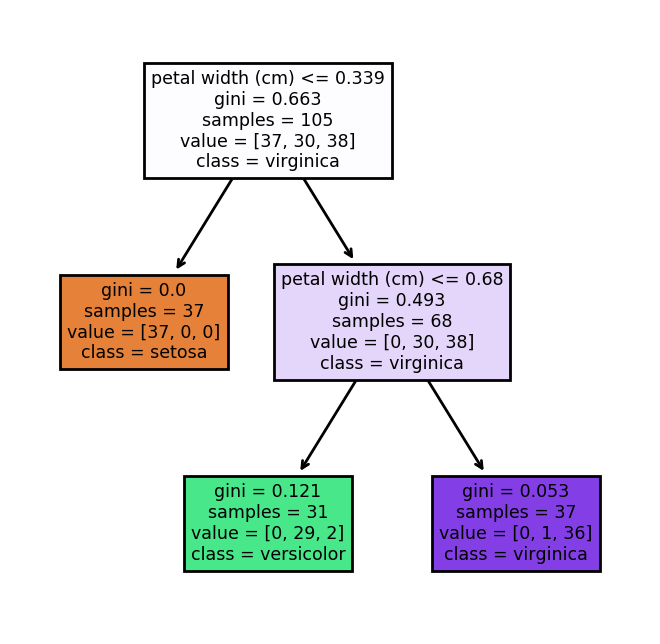

In [64]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')


In [70]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)

print('Random Forest - ',accuracy_score(rfc_predict,y_test))


Random Forest -  0.9555555555555556


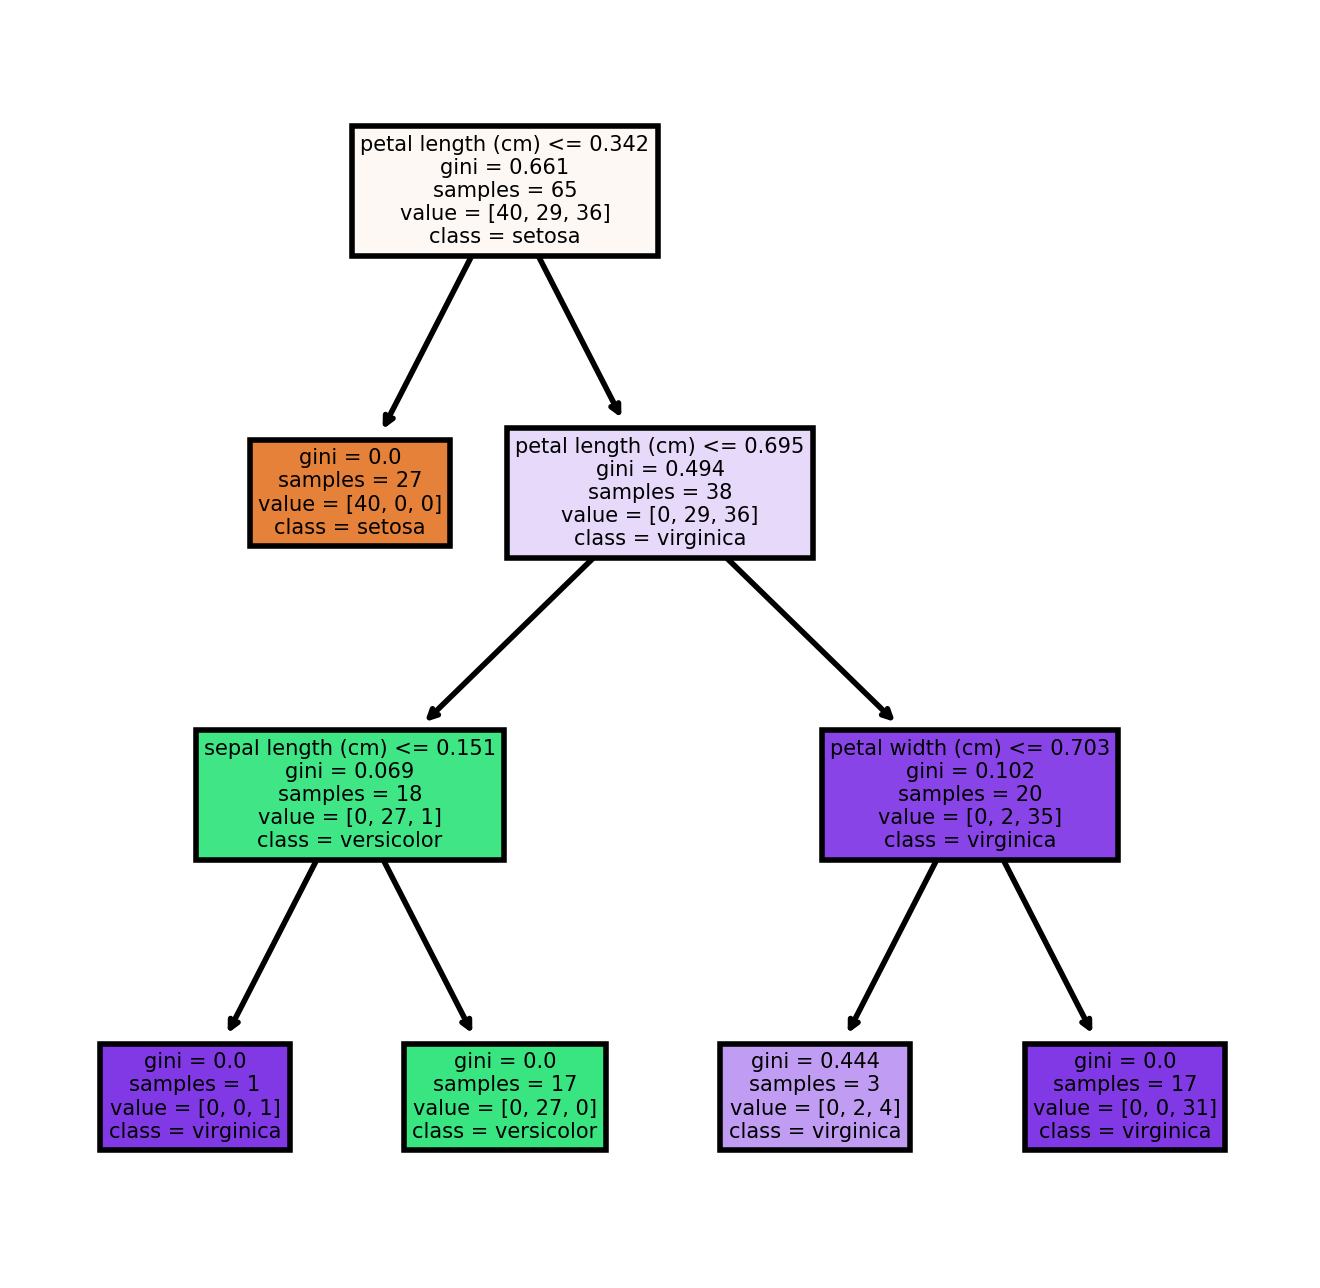

In [71]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(rfc_model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')